Używane biblioteki

In [17]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Lagrange'a

Wielomian interpolacyjny newtona:
P(x) = L0(x) * y0 + L1(x) * y0 + ... Ln * yn


In [79]:
def lagrange_interpolation(xs, ys, x): 

    if len(xs) != len(ys): return

    P = 0 #Value of a polynomial at point x

    for i in range(len(xs)):

        L = 1 #lagrange's base

        for j in range(len(xs)):

            if xs[i] != xs[j]: 

                L *= (x - xs[j]) / (xs[i] - xs[j])

        P += (L * ys[i])

    return P

Iterpolacja Newtona - metoda ilorazów skończonych

Wielomian interpolacyjny Newtona:

Pn(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + ... + an(x - x0)(x - x1)(x - xn)

Wielomian interpolacyjny z ilorazami różnicowymi

Pn(x) = f[x0] + (x - x0)f[x0, x1] + (x - x0)(x - x1)f[x0, x1, x2] + ... + (x - x0)(x - x1)...(x-xn-1)f[x0, x1, ..., xn]

In [176]:
def newton_interpolation(xs, ys, x):

    if len(xs) != len(ys): return

    coefficients = [ys[0]]

    #Dfference quotients array
    diffs = copy.deepcopy(ys)
    
    for i in range(len(xs) -2, -1, -1):

        for j in range(0, i + 1):
            
            diffs[j] = (diffs[j+1] - diffs[j]) / (xs[j + ((len(xs) - i) - 1)] - xs[j])

        coefficients.append(diffs[0])

    #horner
    result = coefficients[-1]

    for i in range(len(coefficients) - 2, -1, -1):
        result = result * (x - xs[i]) + coefficients[i]

    return result

Równomiernie rozprowadzone punkty

In [7]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, density = 100):
    
    length = abs(b - a)
    h = length / (density - 1)
    
    return [a + i * h for i in range(density)]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [3]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Rysowanie wykresu funkcji danej zbiorem punktow

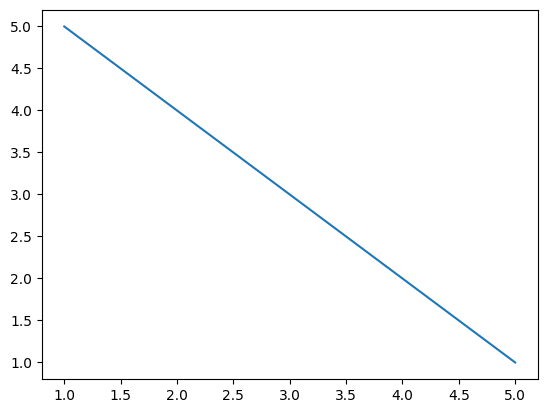

In [16]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

plt.plot(x, y)

Rysowanie funkcji danej wzorem

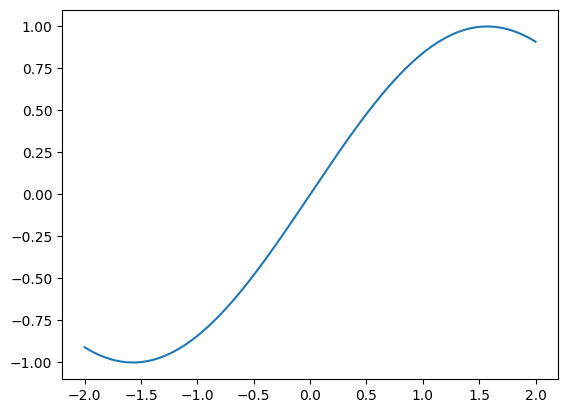

In [20]:
def f(x):
    return math.sin(x)

a = -2
b = 2
pts_count = 1000

x = np.linspace(a, b, pts_count)
y = [f(x[i]) for i in range(pts_count)]

plt.plot(x, y)